In [13]:
import h5py
import numpy as np
from matplotlib.pyplot import imshow

In [18]:
reader = h5py.File("data/PoissonData_NEW_s128.h5")

In [7]:
reader["min_inp"][()]
reader["max_inp"][()]

3.70910641377348

In [19]:
inp = reader["Sample_0"]["input"][:]
out = reader["Sample_0"]["output"][:]

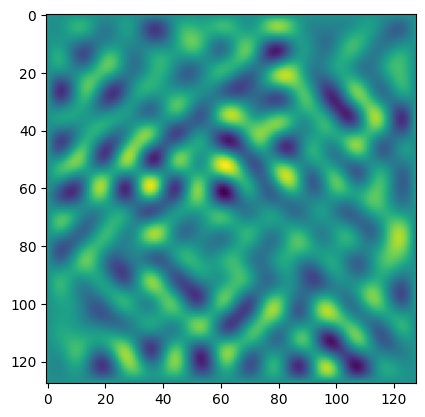

In [20]:
imshow(inp)

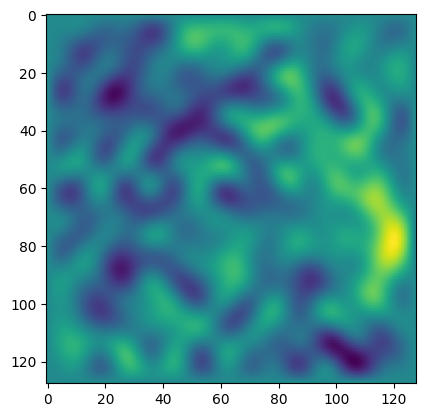

In [21]:
imshow(out)

# Plotting results from trained FNO for Poisson Equation

In [18]:
from Problems.FNOBenchmarks import SinFrequency
import torch
from matplotlib.pyplot import imshow 

In [4]:
training_properties = {
    "learning_rate": 0.001,
    "weight_decay": 1e-8,
    "scheduler_step": 0.97,
    "scheduler_gamma": 10,
    "epochs": 600,
    "batch_size": 16,
    "exp": 1,
    "training_samples": 512,
}
fno_architecture_ = {
    "width": 32,
    "modes": 16,
    "FourierF" : 0, #Number of Fourier Features in the input channels. Default is 0.
    "n_layers": 2, #Number of Fourier layers
    "retrain": 4, #Random seed
}
device = "cpu"

In [6]:
poisson = SinFrequency(fno_architecture_, device, training_properties["batch_size"] ,training_properties["training_samples"])
model = poisson.model
test_loader = poisson.test_loader

In [8]:
model = torch.load("TrainedModels/FNO_poisson/model.pkl")

In [20]:
model.eval()
x, y = next(iter(test_loader))

pred = model(x).detach()


In [28]:
i = 8

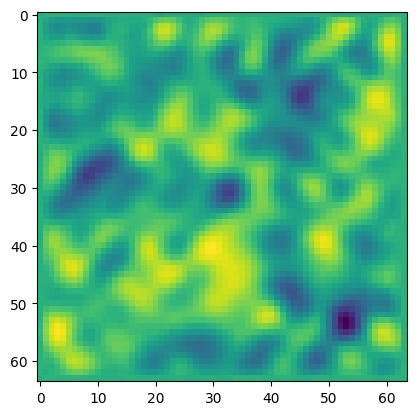

In [29]:
imshow(pred[i, :])

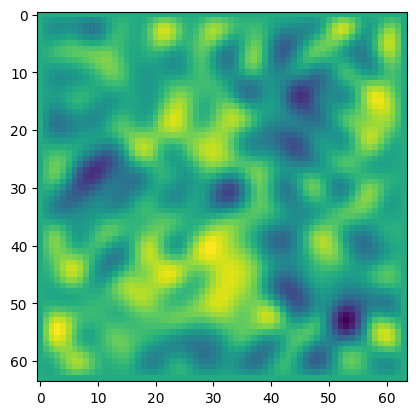

In [30]:
imshow(y[i, :])

# Plotting results from Wave Equation

In [31]:
from Problems.FNOBenchmarks import WaveEquation

In [32]:
wave = WaveEquation(fno_architecture_, device, training_properties["batch_size"] ,training_properties["training_samples"])
test_loader = wave.test_loader

In [33]:
model = torch.load("TrainedModels/FNO_wave_0_5/model.pkl")

In [34]:
model.eval()
x, y = next(iter(test_loader))
pred = model(x).detach()

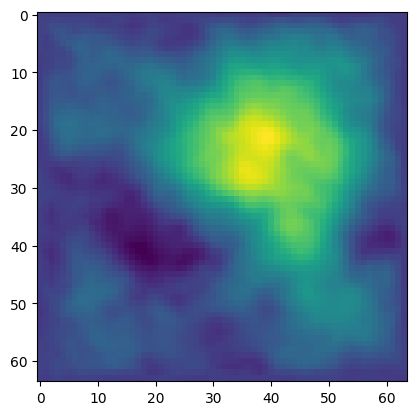

In [35]:
i = 0
imshow(pred[i, :])

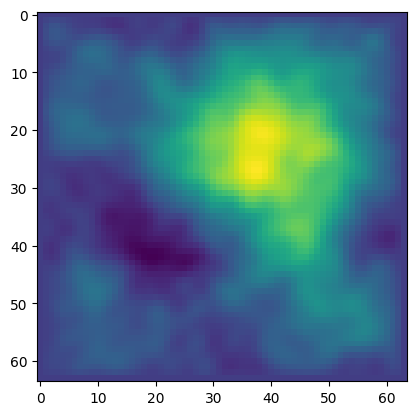

In [36]:
imshow(y[i, :])